# This notebook is for visualizing the objective function 'J' for a 2 state, 2 action Markov Decision Process

## MDP Transition Diagram

#### Number of elements in the state space  (s) = 2
#### Number of elements in the action space (a) = 2

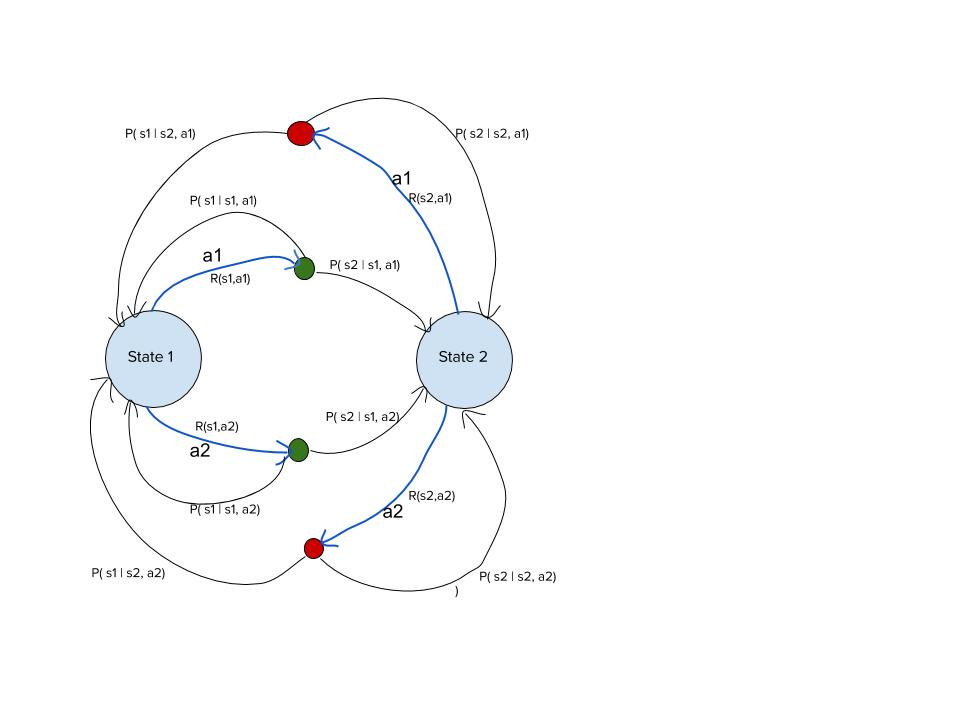

## Import necessary libraries

In [1]:
import numpy as np
import seaborn as sns
sns.set()
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Functions to be implemented
##### 1) Initialize transitions P(S'|S,A) </br>
##### 2) Initialize rewards  R(S,A)</br>
##### 3) Return policy using (x,y)</br>
##### 4) Compute J</br>
##### 5) Plot J</br>


## Initialize transition matrix and rewards vector here

#### Matrix P where P[i][j] = Probability of transitioning to state 'j' from ith state-action pair
#### Vector R where R[i] = Rewards associated with ith state-action pair

In [2]:
def initialize_P_R():
'''
Uncomment random.seed for code reproducibility
'''
    #np.random.seed(0)   
    
    ## Transition probability matrix
    p1 = np.random.rand(1,4)
    p2 = 1-p1
    p =[p1,p2]
    p=np.transpose(p)
    p=np.reshape(p,(4,2))
   
    ## Rewards Matrix
    r=np.random.rand(4,1)
    r=np.reshape(r,(-1,1))                      #Reward vector of shape (s*a, 1)
    return p,r



## Policy pi  
##### Matrix pi of size s x a
pi ( a1|s1 ) = pi[0][0] = x </br>
pi ( a2|s1 ) = pi[0][1] = 1-x </br>
pi ( a1|s2 ) = pi[1][0] = y </br>
pi ( a2|s2 ) = pi[1][1] = 1-y </br>

In [3]:
#function takes x,y and returns a policy vector of dimensions ((|s| x |a|),1)= 4 x 1

def policy(x,y):
    pi=np.array([x,1-x,y,1-y])
    pi=np.reshape(pi,(-1,1))  #converts the matrix to a one single column vector
    return pi


## Compute J = $\rho\$ . V

#### Value function for state 's' under policy 'pi' is given as:
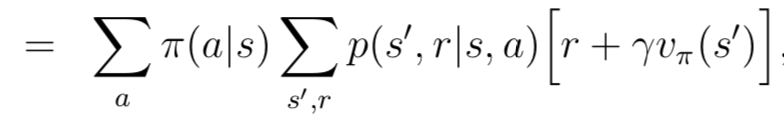
</br>
#### This equation is re-written to the following form, to solve a system of two equations with variables V(1) and V(2):

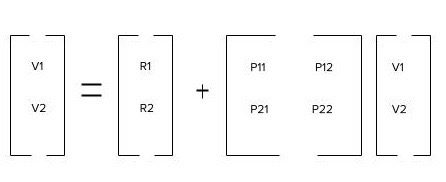

#### Average value under policy pi is then given as : $\Sigma\rho\$iVi

In [4]:
def solve_v(p,r,pi,gamma,rho):
    
    # Computer expected returns vector [R1 R2]
    pr=np.sum(np.reshape(np.multiply(r,pi),(2,2)),axis=1) 
    pr=np.reshape(pr,(-1,1))
    
    # Compute Transition probabilities P(s,s') using P(s'| s,a ) and pi( a|s ) : Matrix of size |s| x |s|
    pi=np.transpose(pi)
    pi2=np.array([pi,pi])
    pi2=np.transpose(pi2)
    pi2=np.reshape(pi2,(-1,1))
    pi_p= np.multiply(pi2,np.reshape(p,(-1,1)))
    pi_p_1= np.reshape(pi_p[:4],(2,2))
    pi_p_2= np.reshape(pi_p[4:],(2,2))
    P_gamma= gamma * np.array([np.sum(pi_p_1,axis=0),np.sum(pi_p_2,axis=0)]) #Include discount factor
    
    # Ax=B  where x= [v1 v2]
    A = np.identity(2)-P_gamma
    B = pr
    
    # [v1 v2] = inverse(A) x (B)
    X = np.dot(np.linalg.inv(A),B)
    
    # J = (p1 * V1) + (p2 * V2)
    J = np.sum(np.multiply(rho,X))
    return J
    
    
    

### Plot function

In [5]:
def plot_3d(X,Y,Z):    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig_size=(10,8)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_zlabel('J', fontsize=30)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.zaxis.label.set_color('black')
    tit= 'State probability distribution = (%0.2f,%0.2f)' %(rho[0],rho[1])
    plt.title(tit)
    plt.rcParams["figure.figsize"] = fig_size
    fig.colorbar(surf, shrink=1, aspect=5)

    plt.show()
    return None

# Example 1

In [29]:
np.random.seed(0)

## Create a mesh of X,Y and Compute Z

In [30]:
#Initialize a meshgrid
x = np.arange(0,1,0.005)         # x= (0, 0.005, 0.01....1)
y = np.arange(0,1,0.005)         # y= (0, 0.005, 0.01....1)
X,Y = np.meshgrid(x, y)         
Z=np.zeros((len(x),len(x)))
rho = np.reshape([0.5,0.5],(-1,1))  #rho is the initial state probability distribution
m=0
mi=np.empty((1,2),dtype=float)

p1,r1=initialize_P_R()
for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = solve_v(p1,r1,policy(x[i],y[j]),0.9,rho)    #Considering Discount factor=0.9
        if(Z[i][j] > m):
            m=Z[i][j]
            mi=[i,j]

In [31]:
np.max(Z)     # Approx Max value of J, across all policies

7.348486429007172

In [32]:
print(p1)

[[0.5488135  0.4511865 ]
 [0.71518937 0.28481063]
 [0.60276338 0.39723662]
 [0.54488318 0.45511682]]


In [33]:
print(r1)

[[0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]]


### Mesh Plot

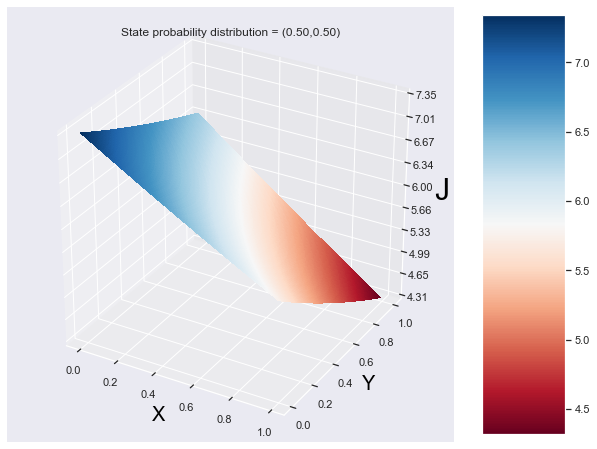

In [34]:
plot_3d(X,Y,Z)

# Example 2

## Create a mesh of X,Y and Compute Z

In [39]:
#Initialize a meshgrid

x = np.arange(0,1,0.005)         # x= (0, 0.005, 0.01....1)
y = np.arange(0,1,0.005)         # y= (0, 0.005, 0.01....1)
X,Y = np.meshgrid(x, y)         
Z=np.zeros((len(x),len(x)))
rho= np.reshape([0.5,0.5],(-1,1))  #rho is the initial state probability distribution
m=0
mi=np.empty((1,2),dtype=float)

p2,r2=initialize_P_R()
for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = solve_v(p2,r2,policy(x[i],y[j]),0.9,rho)    #Considering Discount factor=0.9
        if(Z[i][j] > m):
            m=Z[i][j]
            mi=[i,j]

In [40]:
np.max(Z)     # Approx Max value of J, across all policies

8.73799018146014

In [41]:
print(p2)

[[0.0202184  0.9797816 ]
 [0.83261985 0.16738015]
 [0.77815675 0.22184325]
 [0.87001215 0.12998785]]


In [42]:
print(r2)

[[0.97861834]
 [0.79915856]
 [0.46147936]
 [0.78052918]]


### Mesh Plot

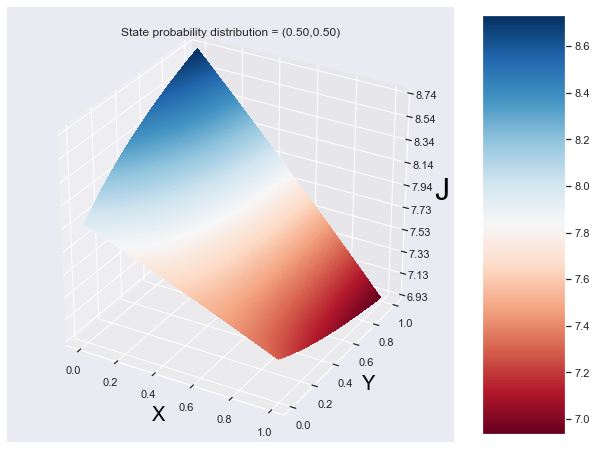

In [43]:
plot_3d(X,Y,Z)

# Example 3

## Create a mesh of X,Y and Compute Z

In [44]:
#Initialize a meshgrid

x = np.arange(0,1,0.005)         # x= (0, 0.005, 0.01....1)
y = np.arange(0,1,0.005)         # y= (0, 0.005, 0.01....1)
X,Y = np.meshgrid(x, y)         
Z=np.zeros((len(x),len(x)))
rho= np.reshape([0.5,0.5],(-1,1))  #rho is the initial state probability distribution
m=0
mi=np.empty((1,2),dtype=float)

p3,r3=initialize_P_R()
for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = solve_v(p3,r3,policy(x[i],y[j]),0.9,rho)    #Considering Discount factor=0.9
        if(Z[i][j] > m):
            m=Z[i][j]
            mi=[i,j]

In [45]:
np.max(Z)     # Approx Max value of J, across all policies

6.434887323590061

In [46]:
p3

array([[0.11827443, 0.88172557],
       [0.63992102, 0.36007898],
       [0.14335329, 0.85664671],
       [0.94466892, 0.05533108]])

In [47]:
r3

array([[0.52184832],
       [0.41466194],
       [0.26455561],
       [0.77423369]])

### Mesh Plot

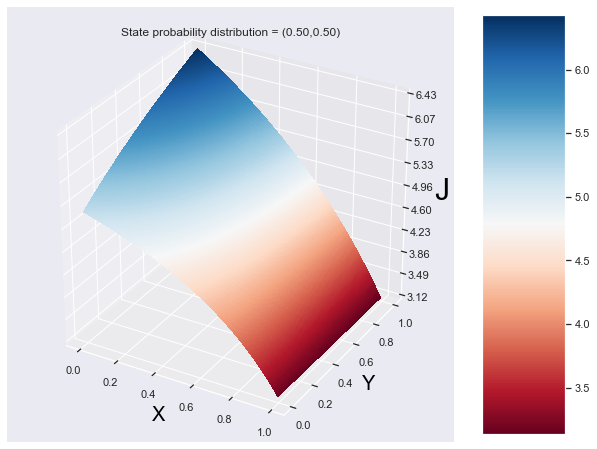

In [48]:
plot_3d(X,Y,Z)

# Example 4

## Create a mesh of X,Y and Compute Z

In [49]:
#Initialize a meshgrid

x = np.arange(0,1,0.005)         # x= (0, 0.005, 0.01....1)
y = np.arange(0,1,0.005)         # y= (0, 0.005, 0.01....1)
X,Y = np.meshgrid(x, y)         
Z=np.zeros((len(x),len(x)))
rho= np.reshape([0.5,0.5],(-1,1)) #rho is the initial state probability distribution
m=0
mi=np.empty((1,2),dtype=float)

p4,r4=initialize_P_R()
for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = solve_v(p4,r4,policy(x[i],y[j]),0.9,rho)    #Considering Discount factor=0.9
        if(Z[i][j] > m):
            m=Z[i][j]
            mi=[i,j]

In [50]:
np.max(Z)     # Approx Max value of J, across all policies

9.046577163752318

In [51]:
p4

array([[0.45615033, 0.54384967],
       [0.56843395, 0.43156605],
       [0.0187898 , 0.9812102 ],
       [0.6176355 , 0.3823645 ]])

In [52]:
r4

array([[0.61209572],
       [0.616934  ],
       [0.94374808],
       [0.6818203 ]])

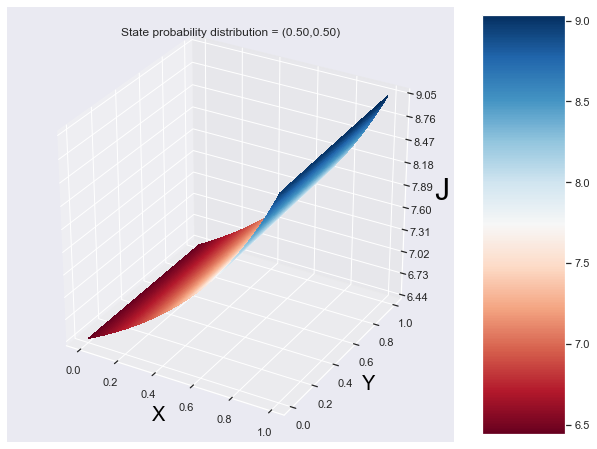

In [53]:
plot_3d(X,Y,Z)